In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
RANGE=120
HOSPITAL_OFFSET=7
ICU_OFFSET=14
FONT_SIZE=12
DEATH_DELAY=3

In [3]:
df_cases=pd.read_csv('https://www.opendata.nhs.scot/dataset/b318bddf-a4dc-4262-971f-0ba329e09b87/resource/287fc645-4352-4477-9c8c-55bc054b7e76/download/daily_cuml_scot_20211206.csv', index_col='Date',parse_dates=True)
df_hospital=pd.read_csv('https://www.opendata.nhs.scot/dataset/b318bddf-a4dc-4262-971f-0ba329e09b87/resource/2dd8534b-0a6f-4744-9253-9565d62f96c2/download/trend_hb_20211206.csv', index_col='Date',parse_dates=True)

df_hospital=df_hospital[df_hospital['HBName']=='Scotland']

ValueError: cannot convert float NaN to integer

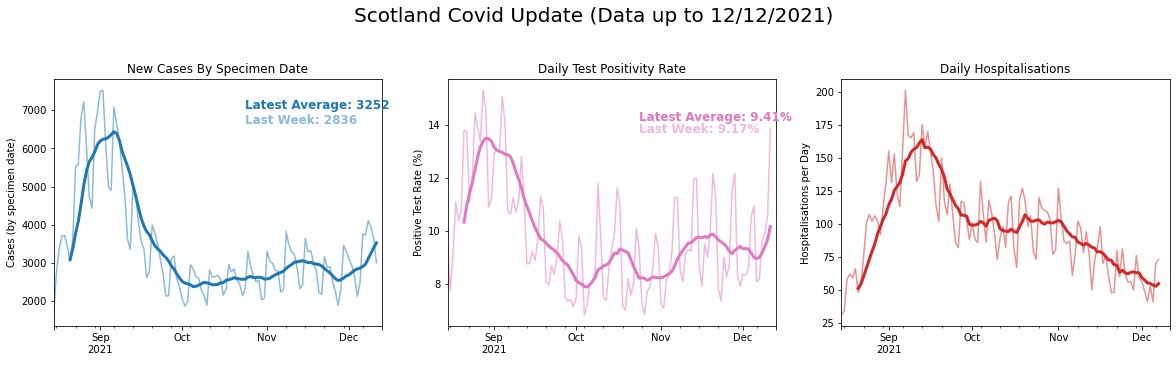

In [4]:
fig=plt.figure(figsize=(20,10))
fig.suptitle('Scotland Covid Update (Data up to '+df_cases.index[-1].strftime("%d/%m/%Y")+")", fontsize=20)

#
# Cases
#

plt.subplot(2,3,1)

df_cases['DailyCases'].iloc[-RANGE:-1].plot(alpha=0.5)
df_cases['DailyCases'].iloc[-RANGE:-1].rolling(window=7).mean().plot(lw=3,c='C0')

plt.ylabel('Cases (by specimen date)')
plt.xlabel(' ')
plt.title('New Cases By Specimen Date')

axes = plt.gca()
y_min, y_max = axes.get_ylim()

plt.text(s='Latest Average: '+str(int(df_cases['DailyCases'].iloc[-RANGE:-1].rolling(window=7).mean()[-3])),x=df_cases['DailyCases'].index[-50],y=0.9*y_max,c='C0', fontsize=FONT_SIZE, weight='bold')
plt.text(s='Last Week: '+str(int(df_cases['DailyCases'].iloc[-RANGE:-8].rolling(window=7).mean()[-1])),x=df_cases['DailyCases'].index[-50],y=0.85*y_max,c='C0', fontsize=FONT_SIZE, weight='bold',alpha=0.5)

x_min, x_max = axes.get_xlim()
axes.set_xlim(x_min, x_max+2)

#
# Pos Rate
#

plt.subplot(2,3,2)
df_hospital['PositivePercentage'].iloc[-RANGE:-1].plot(alpha=0.5,c='C6')
df_hospital['PositivePercentage'].iloc[-RANGE:-1].rolling(window=7).mean().plot(lw=3,c='C6')

plt.ylabel('Positive Test Rate (%)')
plt.xlabel(' ')
plt.title('Daily Test Positivity Rate')

axes = plt.gca()
y_min, y_max = axes.get_ylim()

plt.text(s='Latest Average: '+str(np.round(df_hospital['PositivePercentage'].iloc[-RANGE:-1].rolling(window=7).mean()[-3],2))+'%',x=df_hospital['PositivePercentage'].index[-50],y=0.9*y_max,c='C6', fontsize=FONT_SIZE, weight='bold')
plt.text(s='Last Week: '+str(np.round(df_hospital['PositivePercentage'].iloc[-RANGE:-8].rolling(window=7).mean()[-1],2))+'%',x=df_hospital['PositivePercentage'].index[-50],y=0.87*y_max,c='C6', fontsize=FONT_SIZE, weight='bold',alpha=0.5)

x_min, x_max = axes.get_xlim()
axes.set_xlim(x_min, x_max+2)

#
# Hospital Admissions
#

plt.subplot(2,3,3)
df_hospital['HospitalAdmissions'].iloc[-RANGE:-1].plot(alpha=0.5,c='C3')
df_hospital['HospitalAdmissions'].iloc[-RANGE:-1].rolling(window=7).mean().plot(lw=3,c='C3')

plt.ylabel('Hospitalisations per Day')
plt.xlabel(' ')
plt.title('Daily Hospitalisations')

axes = plt.gca()
y_min, y_max = axes.get_ylim()

plt.text(s='Latest Average: '+str(int(df_hospital['HospitalAdmissions'].iloc[-RANGE:-1].rolling(window=7).mean()[-3])),x=df_hospital['HospitalAdmissions'].index[-50],y=0.9*y_max,c='C3', fontsize=FONT_SIZE, weight='bold')
plt.text(s='Last Week: '+str(int(df_hospital['HospitalAdmissions'].iloc[-RANGE:-8].rolling(window=7).mean()[-1])),x=df_hospital['HospitalAdmissions'].index[-50],y=0.85*y_max,c='C3', fontsize=FONT_SIZE, weight='bold',alpha=0.5)


# 
# Hospitalisation Rate
#

plt.subplot(2,3,4)
((df_hospital['HospitalAdmissions'].iloc[-RANGE:-1]/df_cases['DailyCases'].iloc[-RANGE:-1].shift(HOSPITAL_OFFSET))*100).plot(c='C2',alpha=0.5)
((df_hospital['HospitalAdmissions'].iloc[-RANGE:-1]/df_cases['DailyCases'].iloc[-RANGE:-1].shift(HOSPITAL_OFFSET))*100).rolling(window=7).mean().plot(c='C2',lw=3)
plt.ylabel('Hospitalisation Rate (%)')
plt.xlabel(' ')
plt.title('Rate of Hospitalisation of Cases 7 Days Prior')

latest=((df_hospital['HospitalAdmissions'].iloc[-RANGE:-1]/df_cases['DailyCases'].iloc[-RANGE:-1].shift(HOSPITAL_OFFSET))*100).rolling(window=7).mean()[-3]
last_week=((df_hospital['HospitalAdmissions'].iloc[-RANGE:-8]/df_cases['DailyCases'].iloc[-RANGE:-8].shift(HOSPITAL_OFFSET))*100).rolling(window=7).mean()[-1]

axes = plt.gca()
y_min, y_max = axes.get_ylim()

plt.text(s='Latest Average: '+str(np.round(latest,2))+'%',x=df_hospital['HospitalAdmissions'].index[-50],y=0.9*y_max,c='C2', fontsize=FONT_SIZE, weight='bold')
plt.text(s='Latest Average: '+str(np.round(last_week,2))+'%',x=df_hospital['HospitalAdmissions'].index[-50],y=0.86*y_max,c='C2', fontsize=FONT_SIZE, weight='bold',alpha=0.5)


# 
# ICU Rate
#

plt.subplot(2,3,5)
df_hospital['ICUAdmissions']
((df_hospital['ICUAdmissions'].iloc[-RANGE:-1]/df_cases['DailyCases'].iloc[-RANGE:-1].shift(ICU_OFFSET))*100).plot(c='C4',alpha=0.5)
((df_hospital['ICUAdmissions'].iloc[-RANGE:-1]/df_cases['DailyCases'].iloc[-RANGE:-1].shift(ICU_OFFSET))*100).rolling(window=7).mean().plot(c='C4',lw=3)

plt.ylabel('ICU Rate (%)')
plt.xlabel(' ')
plt.title('Rate of ICU Admission of Cases 14 Days Prior')
plt.tight_layout()

latest=((df_hospital['ICUAdmissions'].iloc[-RANGE:-1]/df_cases['DailyCases'].iloc[-RANGE:-1].shift(ICU_OFFSET))*100).rolling(window=7).mean()[-1]
last_week=((df_hospital['ICUAdmissions'].iloc[-RANGE:-8]/df_cases['DailyCases'].iloc[-RANGE:-8].shift(ICU_OFFSET))*100).rolling(window=7).mean()[-1]
axes = plt.gca()
y_min, y_max = axes.get_ylim()
plt.text(s='Latest Average: '+str(np.round(latest,2))+'%',x=df_hospital['ICUAdmissions'].index[-50],y=0.9*y_max,c='C4', fontsize=FONT_SIZE, weight='bold')
plt.text(s='Last Week: '+str(np.round(last_week,2))+'%',x=df_hospital['ICUAdmissions'].index[-50],y=0.85*y_max,c='C4', fontsize=FONT_SIZE, weight='bold',alpha=0.5)

x_min, x_max = axes.get_xlim()
axes.set_xlim(x_min, x_max+2)

#
# Deaths
#

plt.subplot(2,3,6)
df_hospital['DailyDeaths'].iloc[-RANGE:-DEATH_DELAY].plot(alpha=0.5,c='C5')
df_hospital['DailyDeaths'].iloc[-RANGE:-DEATH_DELAY].rolling(window=7).mean().plot(lw=3,c='C5')

plt.ylabel('Number of Daily Deaths')
plt.xlabel(' ')
plt.title('Daily Number of Deaths (within 28 days of COVID)')
plt.tight_layout()
axes = plt.gca()
y_min, y_max = axes.get_ylim()
plt.text(s='Latest Average: '+str(int(df_hospital['DailyDeaths'].iloc[-RANGE:-DEATH_DELAY].rolling(window=7).mean()[-3])),x=df_hospital['DailyDeaths'].index[-50],y=0.9*y_max,c='C5', fontsize=FONT_SIZE, weight='bold')
plt.text(s='Last Week: '+str(int(df_hospital['DailyDeaths'].iloc[-RANGE:-DEATH_DELAY-7].rolling(window=7).mean()[-3])),x=df_hospital['DailyDeaths'].index[-50],y=0.85*y_max,c='C5', fontsize=FONT_SIZE, weight='bold',alpha=0.5)

x_min, x_max = axes.get_xlim()
axes.set_xlim(x_min, x_max+2)

In [6]:
# df_cases.to_csv('df_cases.csv')
# df_hospital.to_csv('df_hospital.csv')
# data=pd.merge(df_hospital, df_cases, left_index=True, right_index=True)
# data.to_csv('merged_data.csv')

In [7]:

from plotly.subplots import make_subplots

specs=[[{"secondary_y": False}, {"secondary_y": False},{"secondary_y": False}], 
                           [{"secondary_y": False}, {"secondary_y": False},{"secondary_y": False}]
                           ]


fig = make_subplots(rows=2,cols=3,specs=specs, subplot_titles=['Cases','Positive Test Rate','Hospitalisations','Hospitalisation Rate', 'ICU Rate', 'Deaths'],vertical_spacing = 0.15,horizontal_spacing = 0.1)

#
# Cases
#
fig.add_scatter(x=df_cases.iloc[-RANGE:-1].index, y=df_cases['DailyCases'].iloc[-RANGE:-1], mode='lines',name='Cases',line_color='blue',opacity=0.25,row=1,col=1)
fig.add_scatter(x=df_cases.iloc[-RANGE:-1].rolling(window=7).mean().index, y=df_cases['DailyCases'].iloc[-RANGE:-1].rolling(window=7).mean(), mode='lines',name='Cases 7DMA',line_color='blue',line_width=3,row=1,col=1)

#
# Pos Rate
#

fig.add_scatter(x=df_hospital.iloc[-RANGE:-1].index, y=df_hospital['PositivePercentage'].iloc[-RANGE:-1], mode='lines',name='Pos Rate',line_color='green',opacity=0.25,row=1,col=2)
fig.add_scatter(x=df_hospital.iloc[-RANGE:-1].rolling(window=7).mean().index, y=df_hospital['PositivePercentage'].iloc[-RANGE:-1].rolling(window=7).mean(), mode='lines',name='Pos Rate',line_color='green',line_width=3,row=1,col=2)

#
# Hospital Admissions
#
fig.add_scatter(x=df_hospital.iloc[-RANGE:-1].index, y=df_hospital['HospitalAdmissions'].iloc[-RANGE:-1], mode='lines',name='Admissions',line_color='red',opacity=0.25,row=1,col=3)
fig.add_scatter(x=df_hospital.iloc[-RANGE:-1].rolling(window=7).mean().index, y=df_hospital['HospitalAdmissions'].iloc[-RANGE:-1].rolling(window=7).mean(), mode='lines',name='Admissions',line_color='red',line_width=3,row=1,col=3)

#
# Hosp Rate
#

fig.add_scatter(x=df_hospital.iloc[-RANGE:-1].index, y=((df_hospital['HospitalAdmissions'].iloc[-RANGE:-1]/df_cases['DailyCases'].iloc[-RANGE:-1].shift(HOSPITAL_OFFSET))*100), mode='lines',name='Hosp. Rate',line_color='purple',opacity=0.25,row=2,col=1)
fig.add_scatter(x=df_hospital.iloc[-RANGE:-1].index, y=((df_hospital['HospitalAdmissions'].iloc[-RANGE:-1]/df_cases['DailyCases'].iloc[-RANGE:-1].shift(HOSPITAL_OFFSET))*100).rolling(window=7).mean(), mode='lines',name='Hosp. Rate',line_color='purple',line_width=3,row=2,col=1)

#
# ICU Rate
#

fig.add_scatter(x=df_hospital['ICUAdmissions'].iloc[-RANGE:-1].index, y=((df_hospital['ICUAdmissions'].iloc[-RANGE:-1]/df_cases['DailyCases'].iloc[-RANGE:-1].shift(ICU_OFFSET))*100), mode='lines',name='ICU Rate',line_color='brown',opacity=0.25,row=2,col=2)
fig.add_scatter(x=df_hospital['ICUAdmissions'].iloc[-RANGE:-1].index, y=((df_hospital['ICUAdmissions'].iloc[-RANGE:-1]/df_cases['DailyCases'].iloc[-RANGE:-1].shift(ICU_OFFSET))*100).rolling(window=7).mean(), mode='lines',name='ICU Rate',line_color='brown',line_width=3,row=2,col=2)

#
# Deaths
#

fig.add_scatter(x=df_hospital['DailyDeaths'].iloc[-RANGE:-DEATH_DELAY].index, y=df_hospital['DailyDeaths'].iloc[-RANGE:-DEATH_DELAY], mode='lines',name='Hospitalisations',line_color='black',opacity=0.25,row=2,col=3)
fig.add_scatter(x=df_hospital['DailyDeaths'].iloc[-RANGE:-DEATH_DELAY].index, y=df_hospital['DailyDeaths'].iloc[-RANGE:-DEATH_DELAY].rolling(window=7).mean(), mode='lines',name='Hospitalisations7DMA',line_color='black',line_width=3,row=2,col=3)

fig['layout']['yaxis']['title']='Cases/Day'
fig['layout']['yaxis2']['title']='Positive Test Rate (%)'
fig['layout']['yaxis3']['title']='Admissions/Day'
fig['layout']['yaxis4']['title']='Hospitalisation Rate (%)'
fig['layout']['yaxis5']['title']='ICU Rate (%)'
fig['layout']['yaxis6']['title']='Deaths'

# fig.update_layout(
#     xaxis_range = [ df_cases.iloc[-RANGE:-1].index[0].date().strftime('%d-%m-%Y'), (df_cases.iloc[-RANGE:-1].index[-1].date()+pd.Timedelta(days=7)).strftime('%d-%m-%Y') ] 
# )
fig.update_xaxes(range = [df_cases.iloc[-RANGE:-1].index[0], (df_cases.iloc[-RANGE:-1].index[-1].date()+pd.Timedelta(days=7))])

fig.update_layout(height=600, width=1000, title_text="Scotland COVID Update (Data to "+df_cases.index[-1].strftime("%d/%m/%Y")+")", margin=dict(l=60, r=60, t=60, b=60))
fig.update_layout(showlegend=False)
fig.show()

In [9]:
df_local=pd.read_csv('https://www.opendata.nhs.scot/dataset/b318bddf-a4dc-4262-971f-0ba329e09b87/resource/427f9a25-db22-4014-a3bc-893b68243055/download/trend_ca_20211213.csv', index_col='Date',parse_dates=True)

<AxesSubplot:xlabel='Date'>

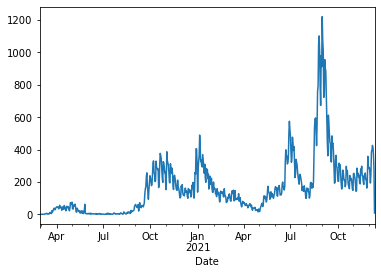

In [10]:
df_local[df_local['CAName']=='Glasgow City']['DailyPositive'].plot()

In [11]:
# df_local.to_csv('df_city.csv')

In [12]:
sorted(df_local['CAName'].unique().tolist()).index('Glasgow City')

14

In [13]:
df_local.columns.tolist()

['CA',
 'CAName',
 'DailyPositive',
 'CumulativePositive',
 'CrudeRatePositive',
 'CrudeRate7DayPositive',
 'DailyDeaths',
 'CumulativeDeaths',
 'CrudeRateDeaths',
 'DailyNegative',
 'CumulativeNegative',
 'CrudeRateNegative',
 'TotalTests',
 'PositiveTests',
 'PositivePercentage',
 'PositivePercentage7Day',
 'TotalPillar1',
 'TotalPillar2',
 'PositivePillar1',
 'PositivePillar2']

In [17]:
gov_uk_hospital_scot=pd.read_csv('https://coronavirus.data.gov.uk/api/v1/data?filters=areaType=nation;areaName=Scotland&structure=%7B%22areaType%22:%22areaType%22,%22areaName%22:%22areaName%22,%22areaCode%22:%22areaCode%22,%22date%22:%22date%22,%22hospitalCases%22:%22hospitalCases%22%7D&format=csv',index_col='date',parse_dates=True)

In [21]:
df_hospital=pd.read_csv('https://www.opendata.nhs.scot/dataset/b318bddf-a4dc-4262-971f-0ba329e09b87/resource/2dd8534b-0a6f-4744-9253-9565d62f96c2/download/trend_hb_20211210.csv', index_col='Date',parse_dates=True)
gov_uk_hospital_scot=pd.read_csv('https://coronavirus.data.gov.uk/api/v1/data?filters=areaType=nation;areaName=Scotland&structure=%7B%22areaType%22:%22areaType%22,%22areaName%22:%22areaName%22,%22areaCode%22:%22areaCode%22,%22date%22:%22date%22,%22hospitalCases%22:%22hospitalCases%22%7D&format=csv',index_col='date',parse_dates=True)


In [25]:
df_hospital=df_hospital[df_hospital['HBName']=='Scotland']

In [23]:
gov_uk_hospital_scot

,areaType,areaName,areaCode,hospitalCases
date,,,,
2021-12-13,nation,Scotland,S92000003,561
2021-12-12,nation,Scotland,S92000003,541
2021-12-11,nation,Scotland,S92000003,552
2021-12-10,nation,Scotland,S92000003,573
2021-12-09,nation,Scotland,S92000003,578
...,...,...,...,...
2020-03-31,nation,Scotland,S92000003,752
2020-03-30,nation,Scotland,S92000003,627
2020-03-29,nation,Scotland,S92000003,565


In [26]:
df_hospital

,HB,HBName,DailyPositive,CumulativePositive,CrudeRatePositive,CrudeRate7DayPositive,DailyDeaths,CumulativeDeaths,CrudeRateDeaths,DailyNegative,...,PositivePercentage,PositivePercentage7Day,TotalPillar1,TotalPillar2,HospitalAdmissions,HospitalAdmissionsQF,ICUAdmissions,ICUAdmissionsQF,PositivePillar1,PositivePillar2
Date,,,,,,,,,,,,,,,,,,,,,
2020-02-28,S92000003,Scotland,1,1,0.018295,NaN,0,0,0.000000,121,...,1.219512,NaN,164,0,NaN,:,NaN,:,2,0
2020-02-29,S92000003,Scotland,0,1,0.018295,NaN,0,0,0.000000,63,...,0.000000,NaN,90,0,NaN,:,NaN,:,0,0
2020-03-01,S92000003,Scotland,2,3,0.054885,NaN,0,0,0.000000,72,...,2.173913,NaN,92,0,6.0,NaN,NaN,:,2,0
2020-03-02,S92000003,Scotland,1,4,0.073180,NaN,0,0,0.000000,190,...,1.515152,NaN,264,0,11.0,NaN,NaN,:,4,0
2020-03-03,S92000003,Scotland,3,7,0.128064,NaN,0,0,0.000000,209,...,2.083333,NaN,288,0,13.0,NaN,NaN,:,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-08,S92000003,Scotland,4107,758982,13885.510428,397.969265,1,9716,177.753385,7996,...,9.631753,8.939438,15247,30456,NaN,:,6.0,NaN,236,4166
2021-12-09,S92000003,Scotland,3935,762917,13957.500915,416.465423,2,9718,177.789974,7307,...,9.901635,9.182180,12381,30622,NaN,:,0.0,NaN,197,4061
2021-12-10,S92000003,Scotland,3627,766544,14023.856568,434.540798,1,9719,177.808269,6385,...,10.572009,9.444434,9885,26513,NaN,:,3.0,NaN,174,3674


In [37]:
gov_uk_hospital_scot['hospitalCases']

date
2021-12-13    561
2021-12-12    541
2021-12-11    552
2021-12-10    573
2021-12-09    578
             ... 
2020-03-31    752
2020-03-30    627
2020-03-29    565
2020-03-28    511
2020-03-27    404
Name: hospitalCases, Length: 627, dtype: int64

In [40]:
df_hospital['HospitalAdmissions']

Date
2020-02-28     NaN
2020-02-29     NaN
2020-03-01     6.0
2020-03-02    11.0
2020-03-03    13.0
              ... 
2021-12-08     NaN
2021-12-09     NaN
2021-12-10     NaN
2021-12-11     NaN
2021-12-12     NaN
Name: HospitalAdmissions, Length: 654, dtype: float64

<AxesSubplot:>

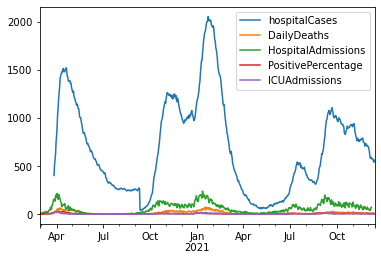

In [46]:
pd.concat([gov_uk_hospital_scot['hospitalCases'],df_hospital[['DailyDeaths','HospitalAdmissions','PositivePercentage','ICUAdmissions']]],axis=1).plot()

<AxesSubplot:xlabel='Date'>

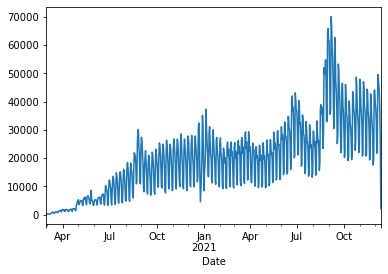

In [50]:
df_hospital['TotalTests'].plot()

In [47]:
gov_uk_hospital_scot.to_csv('gov_uk_hospital_scot.csv')

In [48]:
df_local.columns

Index(['CA', 'CAName', 'DailyPositive', 'CumulativePositive',
       'CrudeRatePositive', 'CrudeRate7DayPositive', 'DailyDeaths',
       'CumulativeDeaths', 'CrudeRateDeaths', 'DailyNegative',
       'CumulativeNegative', 'CrudeRateNegative', 'TotalTests',
       'PositiveTests', 'PositivePercentage', 'PositivePercentage7Day',
       'TotalPillar1', 'TotalPillar2', 'PositivePillar1', 'PositivePillar2'],
      dtype='object')

In [108]:
cases=df_cases['DailyCases'].iloc[-500:-5].values

In [109]:
admissions=df_hospital[df_hospital['HBName']=='Scotland']['HospitalAdmissions'].iloc[-500:-5].values

In [112]:
# Case to hospital delay: 7 days
correlation = np.correlate(cases,admissions,mode='same')
delay = np.argmax(correlation)-int(len(correlation)/2)
delay

-7

In [117]:
icu=df_hospital['ICUAdmissions'].iloc[-500:-5].values

In [118]:
# Case to hospital delay: 7 days
correlation = np.correlate(admissions,icu,mode='same')
delay = np.argmax(correlation)-int(len(correlation)/2)
delay

0

In [119]:
deaths=df_hospital['DailyDeaths'].iloc[-500:-5].values

In [120]:
# Case to hospital delay: 7 days
correlation = np.correlate(icu,deaths,mode='same')
delay = np.argmax(correlation)-int(len(correlation)/2)
delay

-7

In [121]:
# Case to hospital delay: 7 days
correlation = np.correlate(admissions,deaths,mode='same')
delay = np.argmax(correlation)-int(len(correlation)/2)
delay

-10